In [ ]:
%pip install numpy
%pip install matplotlib 
%pip install -U scikit-learn
%pip install -U tensorflow_datasets

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
from time import time

In [188]:
def plot_loss(history, optimiser, name):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'{name}: Training and Validation Loss using Optimiser {optimiser}')
    plt.show()

def compare_loss(history1, history2, label1, label2, name):
    plt.figure(figsize=(8, 6))
    plt.plot(history1.history['loss'], label=f'Training Loss ({label1})')
    plt.plot(history1.history['val_loss'], label=f'Validation Loss ({label1})')
    plt.plot(history2.history['loss'], label=f'Training Loss ({label2})', linestyle='--')
    plt.plot(history2.history['val_loss'], label=f'Validation Loss ({label2})', linestyle='--')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'{name}: Training and Validation Loss Comparison')
    plt.show()

def compare_accuracy(history1, history2, label1, label2, name):
    plt.figure(figsize=(8, 6))
    plt.plot(history1.history['accuracy'], label=f'Training Accuracy ({label1})')
    plt.plot(history1.history['val_accuracy'], label=f'Validation Accuracy ({label1})')
    plt.plot(history2.history['accuracy'], label=f'Training Accuracy ({label2})', linestyle='--')
    plt.plot(history2.history['val_accuracy'], label=f'Validation Accuracy ({label2})', linestyle='--')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'{name}: Training and Validation Accuracy Comparison')
    plt.show()

def compare_epoch_time(timings, label1, label2, name):
    epochs = int(len(timings) / 2)
    print(f'Epochs: {epochs}')

    first_epochs = [i for i in range(1, epochs+1)]
    second_epochs = first_epochs
    first_timing = timings[0:epochs-1]
    second_timing = timings[epochs:-1]

    plt.figure(figsize = (8,10))
    plt.plot(first_epochs, first_timing, label=f'Epoch time: {label1}')
    plt.plot(second_epochs, second_timing, label=f'Epoch time: {label2}', linestyle='--')
    plt.xlabel('Epoch')
    plt.ylabel('Time (s)')
    plt.title(f'{name}: Epoch Execution Time Comparison')
    plt.show()

In [189]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = keras.utils.to_categorical(y_train, 10), keras.utils.to_categorical(y_test, 10)

In [190]:

# Define the model architecture
deep_feed_forward_less_layers = keras.models.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

deep_feed_forward_more_layers = keras.models.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

DEEP_FORWARD_LESS_NAME = "Deep Feed Forward (less layers/neutrones)"
DEEP_FORWARD_MORE_NAME = "Deep Feed Forward (more layers/neutrones)"

In [191]:
convulational_less_layers = keras.models.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


convulational_more_layers = keras.models.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

CONVULATIONAL_LESS_NAME = "Convulational (less layers/neutrones)"
CONVULATIONAL_MORE_NAME = "Convulational (more layers/neutrones)"

In [192]:
# Adam optimiser
legacy_adam = tf.compat.v1.train.AdamOptimizer()

# Ada delta optimiser
legacy_adadelta = tf.compat.v1.train.AdadeltaOptimizer()

In [193]:
class TimingCallback(tf.keras.callbacks.Callback):
    """Callback to record the timings and epoch

    Args:
        tf (Callback): Class callback.
    """
    timings = []

    def on_epoch_begin(self, epoch, logs=None):
        self.start_time = time()

    def on_epoch_end(self, epoch, logs=None):
        epoch_time = time() - self.start_time
        self.timings.append(epoch_time)

    def get_timings(self):
        timings = self.timings
        return timings

In [194]:
deep_feed_more_adam = deep_feed_forward_more_layers
deep_feed_more_adadelta = deep_feed_forward_more_layers

# Compile the model with the legacy optimizer

deep_feed_more_adam.compile(optimizer=legacy_adam, loss='categorical_crossentropy', metrics=['accuracy'])
deep_feed_more_adadelta.compile(optimizer=legacy_adadelta, loss='categorical_crossentropy', metrics=['accuracy'])

timing_callback = TimingCallback()

# Train the models
history_more_adam = deep_feed_more_adam.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2, callbacks=[timing_callback])

more_layers_epoch_time = timing_callback.get_timings()

history_more_adadelta = deep_feed_more_adadelta.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2)


Epoch 1/10
   1/1500 [..............................] - ETA: 8:15 - loss: 2.2424 - accuracy: 0.1562

2023-03-21 21:10:49.500241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1495/1500 [============================>.] - ETA: 0s - loss: 2.3050 - accuracy: 0.0974

2023-03-21 21:11:03.220158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 16s 11ms/step - loss: 2.3049 - accuracy: 0.0975 - val_loss: 2.2758 - val_accuracy: 0.1248
Epoch 2/10
1500/1500 [==============================] - 15s 10ms/step - loss: 2.2494 - accuracy: 0.1864 - val_loss: 2.2202 - val_accuracy: 0.2508
Epoch 3/10
1500/1500 [==============================] - 16s 10ms/step - loss: 2.1946 - accuracy: 0.3048 - val_loss: 2.1649 - val_accuracy: 0.3472
Epoch 4/10
1500/1500 [==============================] - 15s 10ms/step - loss: 2.1405 - accuracy: 0.3729 - val_loss: 2.1097 - val_accuracy: 0.4026
Epoch 5/10
1500/1500 [==============================] - 15s 10ms/step - loss: 2.0856 - accuracy: 0.4184 - val_loss: 2.0523 - val_accuracy: 0.4458
Epoch 6/10
1500/1500 [==============================] - 15s 10ms/step - loss: 2.0279 - accuracy: 0.4593 - val_loss: 1.9917 - val_accuracy: 0.4847
Epoch 7/10
1500/1500 [==============================] - 15s 10ms/step - loss: 1.9664 - accuracy: 0.4983 - val_loss: 1.9272 - val_accura

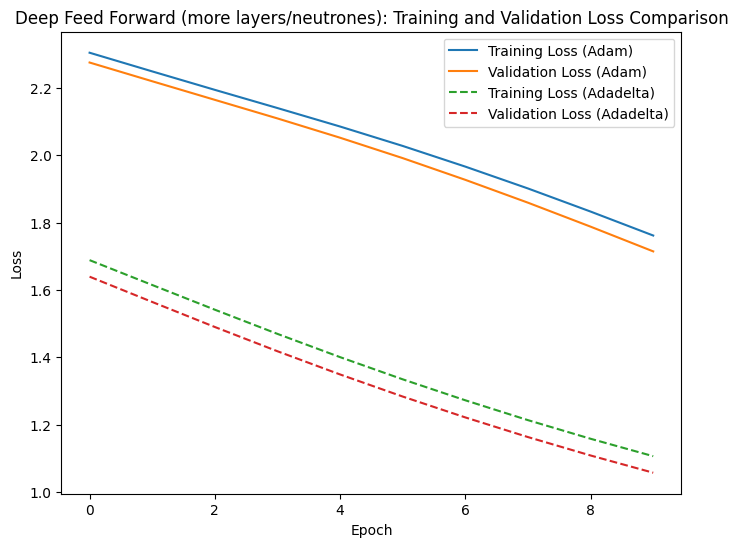

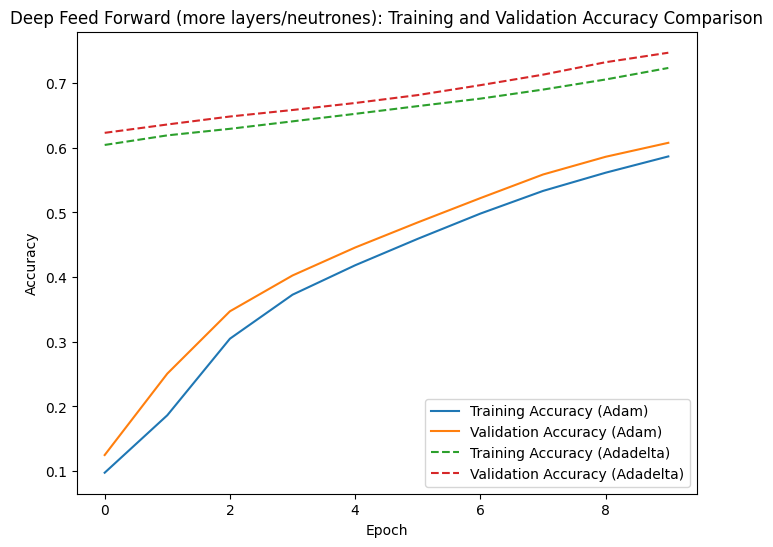

In [195]:
compare_loss(history1=history_more_adam, history2=history_more_adadelta, label1="Adam", label2="Adadelta", name=DEEP_FORWARD_MORE_NAME)
compare_accuracy(history1=history_more_adam, history2=history_more_adadelta, label1="Adam", label2="Adadelta", name=DEEP_FORWARD_MORE_NAME)


In [196]:
deep_feed_less_adam = deep_feed_forward_less_layers
deep_feed_less_adadelta = deep_feed_forward_less_layers

# Compile the model with the legacy optimizer

deep_feed_less_adam.compile(optimizer=legacy_adam, loss='categorical_crossentropy', metrics=['accuracy'])
deep_feed_less_adadelta.compile(optimizer=legacy_adadelta, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the models
history_less_adam = deep_feed_less_adam.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2, callbacks=[timing_callback])

less_layers_epoch_times = timing_callback.get_timings()

history_less_adadelta = deep_feed_less_adam.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2)


Epoch 1/10
   1/1500 [..............................] - ETA: 7:05 - loss: 2.3929 - accuracy: 0.0938

2023-03-21 21:15:52.964180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1498/1500 [============================>.] - ETA: 0s - loss: 2.3487 - accuracy: 0.0892

2023-03-21 21:16:04.601267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 15s 9ms/step - loss: 2.3487 - accuracy: 0.0892 - val_loss: 2.3232 - val_accuracy: 0.0949
Epoch 2/10
1500/1500 [==============================] - 14s 9ms/step - loss: 2.3068 - accuracy: 0.0968 - val_loss: 2.2830 - val_accuracy: 0.1062
Epoch 3/10
1500/1500 [==============================] - 14s 9ms/step - loss: 2.2689 - accuracy: 0.1084 - val_loss: 2.2459 - val_accuracy: 0.1200
Epoch 4/10
1500/1500 [==============================] - 14s 9ms/step - loss: 2.2337 - accuracy: 0.1260 - val_loss: 2.2112 - val_accuracy: 0.1425
Epoch 5/10
1500/1500 [==============================] - 14s 9ms/step - loss: 2.2005 - accuracy: 0.1508 - val_loss: 2.1783 - val_accuracy: 0.1747
Epoch 6/10
1500/1500 [==============================] - 13s 9ms/step - loss: 2.1688 - accuracy: 0.1812 - val_loss: 2.1464 - val_accuracy: 0.2087
Epoch 7/10
1500/1500 [==============================] - 13s 9ms/step - loss: 2.1379 - accuracy: 0.2143 - val_loss: 2.1153 - val_accuracy: 0.2

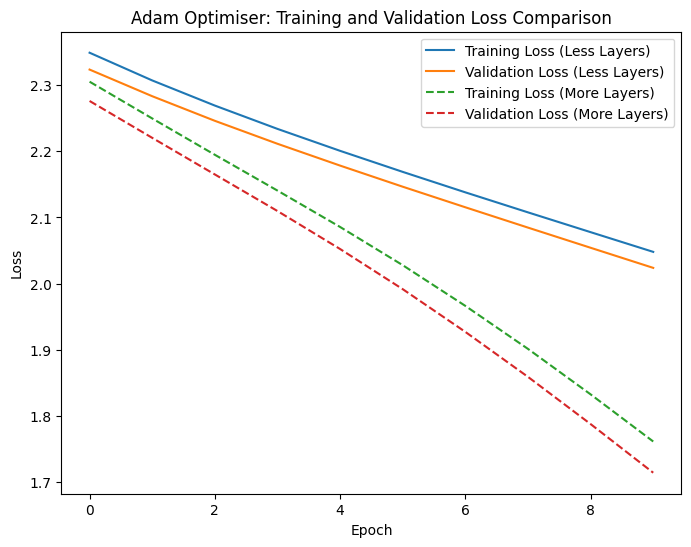

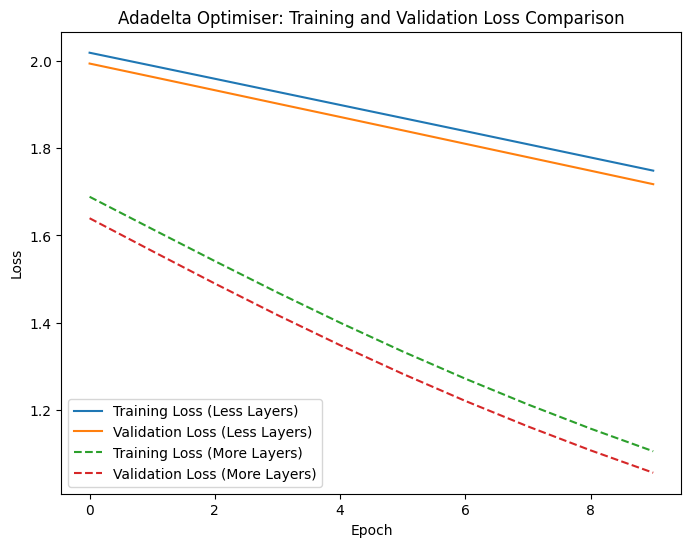

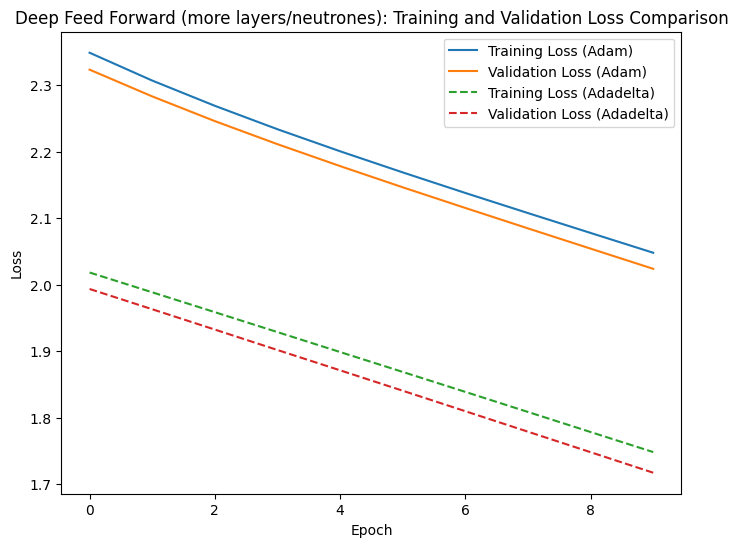

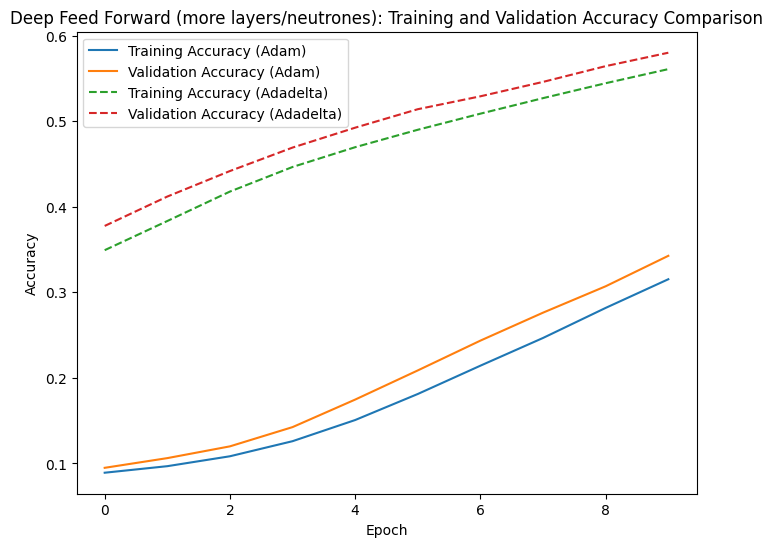

Epochs: 10


UnboundLocalError: local variable 'second_epochs' referenced before assignment

In [197]:

compare_loss(history1=history_less_adam, history2=history_more_adam, label1="Less Layers", label2="More Layers", name="Adam Optimiser")
compare_loss(history1=history_less_adadelta, history2=history_more_adadelta, label1="Less Layers", label2="More Layers", name="Adadelta Optimiser")
compare_loss(history1=history_less_adam, history2=history_less_adadelta, label1="Adam", label2="Adadelta", name=DEEP_FORWARD_MORE_NAME)

compare_accuracy(history1=history_less_adam, history2=history_less_adadelta, label1="Adam", label2="Adadelta", name=DEEP_FORWARD_MORE_NAME)


compare_epoch_time(less_layers_epoch_times, "Less Layers and Neurones", "More Layers and Neurones", "Layer and Neurone")

In [ ]:
conv_more_layers_adam = convulational_more_layers
conv_more_layers_adadelta = convulational_more_layers

# Compile the model with the legacy optimizer
conv_more_layers_adam.compile(optimizer=legacy_adam, loss='categorical_crossentropy', metrics=['accuracy'])
conv_more_layers_adadelta.compile(optimizer=legacy_adadelta, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the models
history_adam = conv_more_layers_adam.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2)
history_adadelta = conv_more_layers_adadelta.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

plot_loss(history=history_adam, optimiser="Adam")
plot_loss(history=history_adadelta, optimiser="Adam")


